In [7]:
import os

import yaml
import numpy as np
import matplotlib.pyplot as plt
import atlasify

from modules.compare import Comparator, ComparatorPlotter, RocAnalyzer

In [2]:
base_dir = "./comparisons/part-aux-all/"
with open(os.path.join(base_dir, "config.yaml"), "r") as f:
    config = yaml.load(f, Loader=yaml.SafeLoader)

## $t\bar{t}$サンプル

In [3]:
comparator_ttbar = Comparator(config, sample="ttbar")
comparator_plotter_ttbar = ComparatorPlotter(comparator_ttbar, save_dir=os.path.join(base_dir, "ttbar", "comparisons"))

meta model:	ParticleNet-Lite
ref. model:	dips
Before cut nan:  4042856
After cut nan:  4038771
No cut by condition
Before cut nan:  4042856
After cut nan:  4038771
No cut by condition


In [4]:
df_concat = comparator_plotter_ttbar.df_concat
df_concat = df_concat[~df_concat.isin([np.inf, -np.inf, np.nan]).any(1)]

In [5]:
def get_btag_wp(Db:np.ndarray, wp:float=0.7):
    return np.quantile(Db, 1-wp)

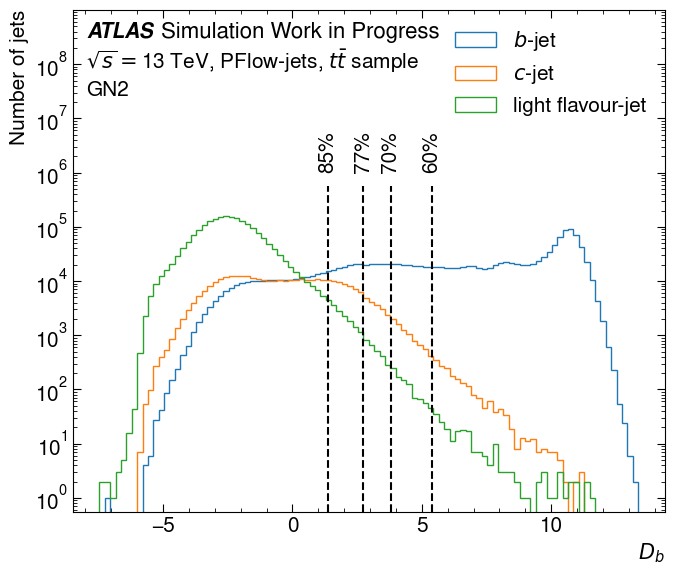

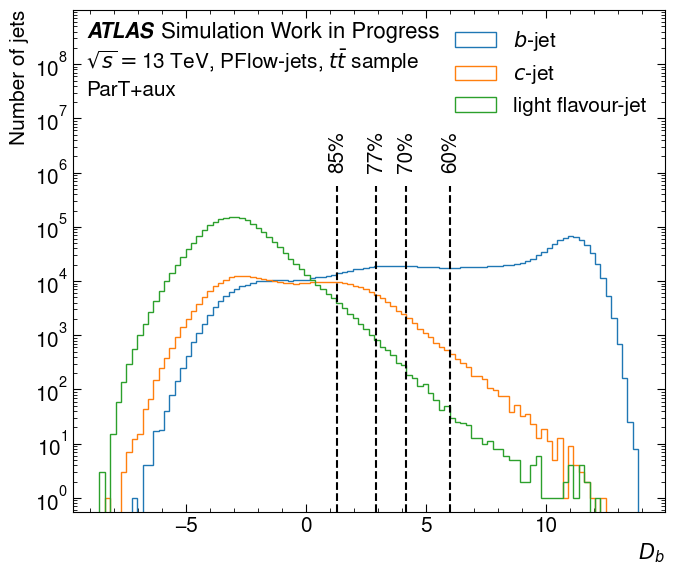

In [6]:
%matplotlib inline
plt.rcParams["font.size"] = 15
for model_name in comparator_ttbar.model_names:
    fig, ax = plt.subplots(figsize=(7, 6))
    Db_min, Db_max = np.min(df_concat[f"Db_{model_name}"]), np.max(df_concat[f"Db_{model_name}"])
    if model_name == "ParticleNet-Lite":
        Db_min = -25
    ax.hist(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], bins=100, range=(Db_min, Db_max), histtype="step", label="$b$-jet")
    ax.hist(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], bins=100, range=(Db_min, Db_max), histtype="step", label="$c$-jet")
    ax.hist(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 0], bins=100, range=(Db_min, Db_max), histtype="step", label="light flavour-jet")
    for wp in [0.60, 0.70, 0.77, 0.85]:
        ax.axvline(get_btag_wp(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], wp=wp), color="black", linestyle="--", ymax=0.65)
        if model_name=="ParticleNet-Lite" and wp in [0.70, 0.77]:
            continue
        ax.text(get_btag_wp(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], wp=wp), 1e6, f"{wp*100:.0f}%", ha="center", va="bottom", rotation=90)
    ax.set_yscale("log")
    ax.set_xlabel(f"$D_{{b}}$", loc="right")
    ax.set_ylabel("Number of jets", loc="top")
    ax.set_ylim(0, 1e7)
    ax.legend(loc="upper right")

    atlasify.atlasify(
        axes=ax,
        atlas="Simulation Work in Progress",
        subtext="$\sqrt{s}=$13 TeV, PFlow-jets, $t\\bar{t}$ sample"+f"\n{model_name}",
        font_size=15,
        sub_font_size=15,
        subtext_distance=0.15,
        enlarge=100,
    )
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, "ttbar", f"Db_{model_name}.pdf"), bbox_inches="tight")
    plt.show()

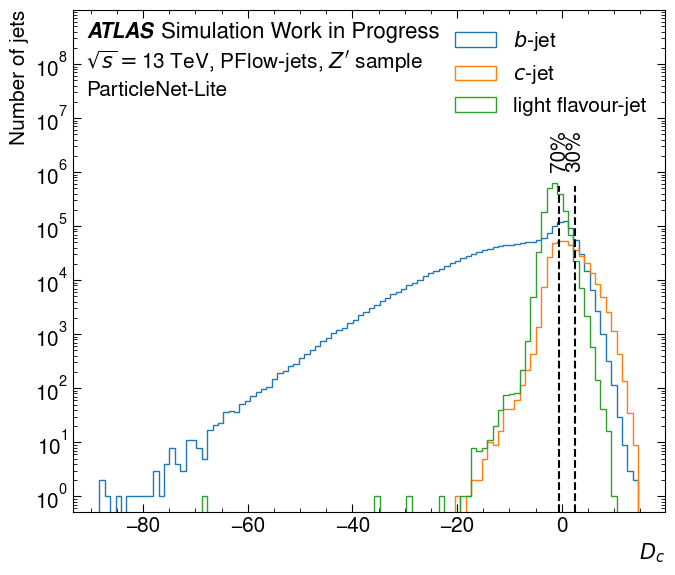

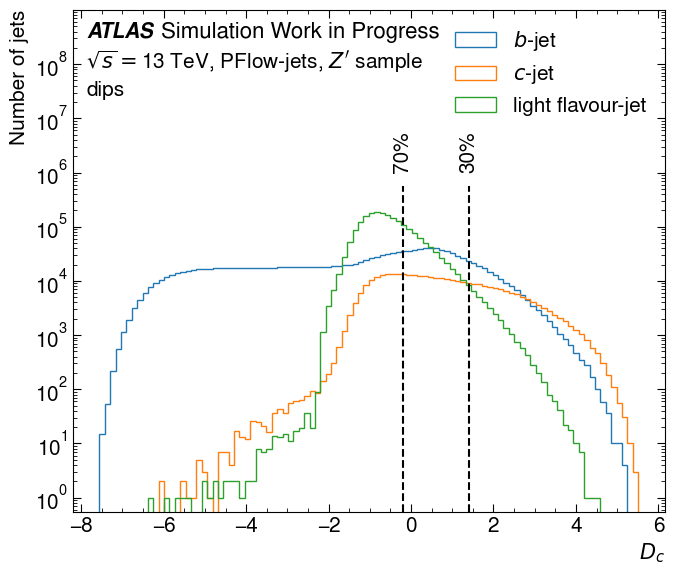

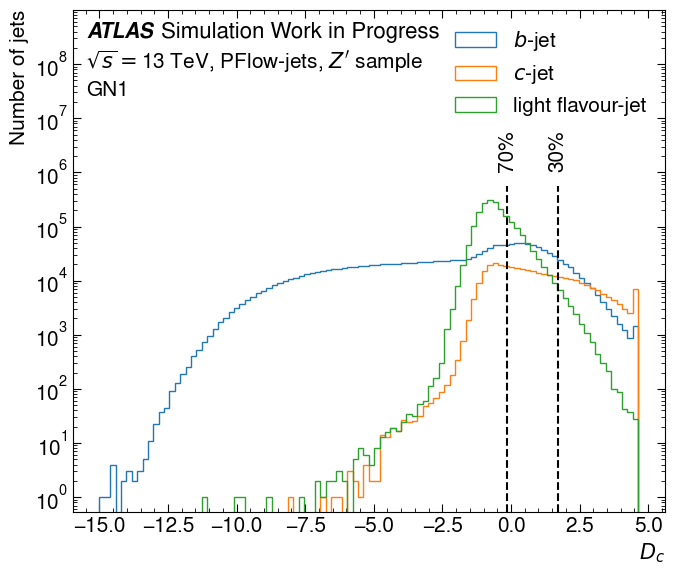

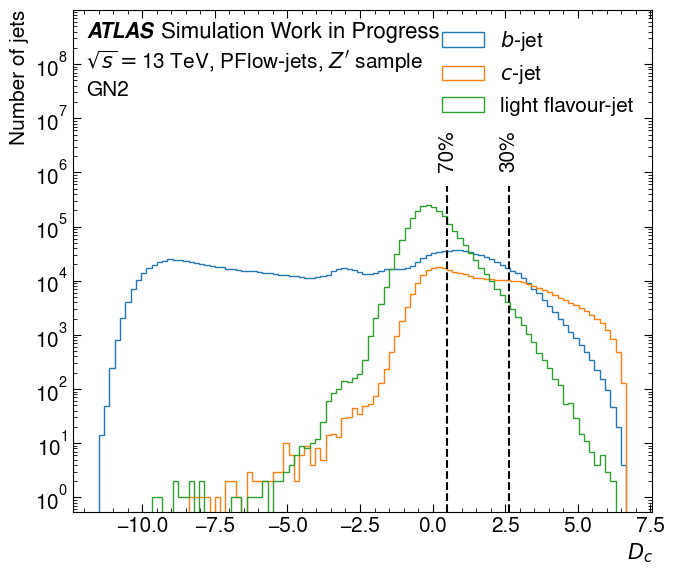

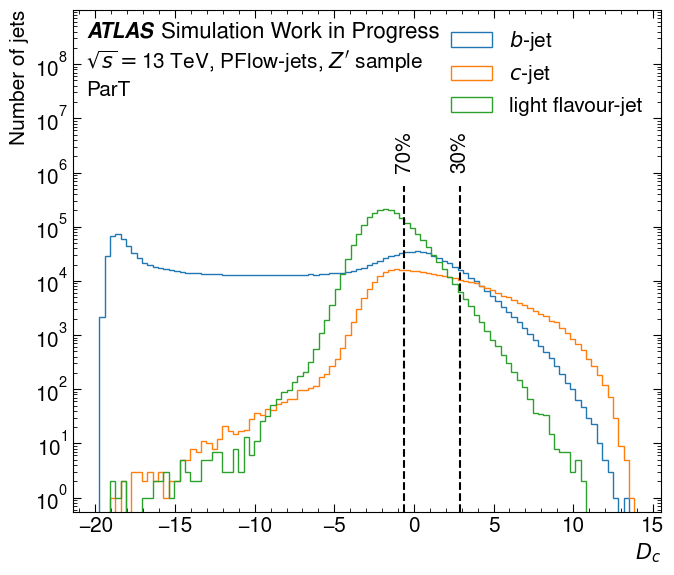

In [9]:
%matplotlib inline
plt.rcParams["font.size"] = 15
for model_name in comparator_ttbar.model_names:
    fig, ax = plt.subplots(figsize=(7, 6))
    Db_min, Db_max = np.min(df_concat[f"Dc_{model_name}"]), np.max(df_concat[f"Dc_{model_name}"])
    if model_name == "GN1":
        Db_min = -15
    if model_name == "ParticleNet-Lite":
        Db_min = -80
    ax.hist(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], bins=100, range=(Db_min, Db_max), histtype="step", label="$b$-jet")
    ax.hist(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], bins=100, range=(Db_min, Db_max), histtype="step", label="$c$-jet")
    ax.hist(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 0], bins=100, range=(Db_min, Db_max), histtype="step", label="light flavour-jet")
    for wp in [0.3, 0.7]:
        ax.axvline(get_btag_wp(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], wp=wp), color="black", linestyle="--", ymax=0.65)
        ax.text(get_btag_wp(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], wp=wp), 1e6, f"{wp*100:.0f}%", ha="center", va="bottom", rotation=90)
    ax.set_yscale("log")
    ax.set_xlabel(f"$D_{{c}}$", loc="right")
    ax.set_ylabel("Number of jets", loc="top")
    ax.set_ylim(0, 1e7)
    ax.legend(loc="upper right")

    atlasify.atlasify(
        axes=ax,
        atlas="Simulation Work in Progress",
        subtext="$\sqrt{s}=$13 TeV, PFlow-jets, $Z'$ sample"+f"\n{model_name}",
        font_size=15,
        sub_font_size=15,
        subtext_distance=0.15,
        enlarge=100,
    )
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, "ttbar", f"Dc_{model_name}.pdf"), bbox_inches="tight")
    plt.show()

In [6]:
def get_Db_thresholds(flavour, _Db, th_bins=np.linspace(0, 1, 100)):
    """
    b-tagのefficiencyが1%, 2%, ..., 99%の時のDbの値を返す
    """
    Db = _Db.copy()[~np.isnan(_Db) & ~np.isinf(_Db)]
    Db_max, Db_min = np.max(Db), np.min(Db)
    bins_Db = np.linspace(Db_min, Db_max, 1000)
    Db_b = Db[flavour == 0]

    # print(bins_Db)

    effs = [np.sum(Db_b > th) / len(Db_b) for th in bins_Db]

    thresholds = []
    for eff in th_bins:
        thresholds.append(bins_Db[np.argmin(np.abs(effs - eff))])
    return thresholds

def get_all_Db_thresholds(df_concat, model_names, bins=np.linspace(0, 1, 100)):
    thresholds = {}
    for model in model_names:
        thresholds[model]= get_Db_thresholds(df_concat["HadronConeExclTruthLabelID"], df_concat[f"Db_{model}"], bins)
    return thresholds

In [7]:
dict_Db_ths = get_all_Db_thresholds(df_concat, comparator_plotter_ttbar.model_names)

In [72]:
df_concat[[f"Db_{model}" for model in comparator_plotter_ttbar.model_names]].describe()

Db_ParticleNet-Lite       Db_dips        Db_GN1        Db_GN2  \
count         4.038770e+06  4.038770e+06  4.038770e+06  4.038770e+06   
mean          2.357643e+00  6.884708e-01  9.207466e-01  1.073237e+00   
std           9.703305e+00  4.429073e+00  4.791171e+00  4.936576e+00   
min          -7.062962e+01 -7.013965e+00 -6.166885e+00 -7.457075e+00   
25%          -3.985739e+00 -2.731153e+00 -2.695524e+00 -2.636722e+00   
50%          -1.897082e+00 -1.247667e+00 -1.253604e+00 -1.246468e+00   
75%           5.478067e+00  3.779952e+00  4.082518e+00  4.237726e+00   
max           8.927478e+01  1.221753e+01  2.624485e+01  1.335712e+01   

            Db_ParT   Db_ParT+aux  
count  4.038770e+06  4.038770e+06  
mean   1.930921e+00  9.470471e-01  
std    8.654194e+00  5.385561e+00  
min   -1.418805e+01 -8.592960e+00  
25%   -4.257209e+00 -3.139620e+00  
50%   -2.171361e+00 -1.605825e+00  
75%    6.148440e+00  4.698254e+00  
max    2.142630e+01  1.381923e+01

In [28]:
from itertools import combinations
import matplotlib

plt.rcParams['font.size'] = 15

def scaler(Db,ths=None):
    _min, _max = np.min(Db), np.max(Db)
    Db_normed = (Db - _min) / (_max - _min)
    if ths is None:
        return Db_normed
    else:
        ths_normed = (ths - _min) / (_max - _min)
        return Db_normed, ths_normed

ths_lines = [10, 30, 50, 70, 90]
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1e6)
for k, (model1, model2) in enumerate(combinations(comparator_plotter_ttbar.model_names, 2)):
    ax = axes[k//5, k%5]
    th_1 = [dict_Db_ths[model1][i] for i in ths_lines]
    th_2 = [dict_Db_ths[model2][i] for i in ths_lines]
    Db_model1, Db_model2 = df_concat[f"Db_{model1}"].values, df_concat[f"Db_{model2}"].values
    # Db_model1, th_1 = scaler(Db_model1, th_1)
    # Db_model2, th_2 = scaler(Db_model2, th_2)
    # if model1 == "ParticleNet-Lite":
    #     bins = (np.linspace(-20, 60, 100), 100)
    # else:
    #     bins = 100
    
    # 上下X個を除いてヒストグラムを描画
    n_cut = 10
    Db_model1_sorted, Db_model2_sorted = np.sort(Db_model1), np.sort(Db_model2)
    m1_10th_min, m1_10th_max = Db_model1_sorted[n_cut], Db_model1_sorted[-n_cut]
    m2_10th_min, m2_10th_max = Db_model2_sorted[n_cut], Db_model2_sorted[-n_cut]
    bins = (np.linspace(m1_10th_min, m1_10th_max, 100), np.linspace(m2_10th_min, m2_10th_max, 100))

    H = ax.hist2d(Db_model1, Db_model2, bins=bins, norm=norm, cmin=1, cmax=1e6)
    ax.set_xlabel(f"Db of {model1}")
    ax.set_ylabel(f"Db of {model2}")

    for i, (_th_1, _th_2) in enumerate(zip(th_1, th_2)):
        ax.vlines(_th_1, Db_model2.min(), Db_model2.max(), color=f"C{i}", linestyle="dashed", label=f"{ths_lines[i]}%")
        ax.hlines(_th_2, Db_model1.min(), Db_model1.max(), color=f"C{i}", linestyle="dashed")

axes[0, -1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
# 右に大きいcolorbarをつける
fig.subplots_adjust(right=1.05)
fig.text(0.94, 0.82, 'All Flavour', va='center')
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.65])
cbar = fig.colorbar(H[3], cax=cbar_ax, norm=norm)
cbar.set_label("Number of jets")
plt.tight_layout()
plt.show()

In [31]:
from itertools import combinations
import matplotlib

plt.rcParams['font.size'] = 15

def scaler(Db,ths=None):
    _min, _max = np.min(Db), np.max(Db)
    Db_normed = (Db - _min) / (_max - _min)
    if ths is None:
        return Db_normed
    else:
        ths_normed = (ths - _min) / (_max - _min)
        return Db_normed, ths_normed

ths_lines = [10, 30, 50, 70, 90]
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1e6)

for k, (model1, model2) in enumerate(combinations(comparator_plotter_ttbar.model_names, 2)):
    ax = axes[k//5, k%5]
    th_1 = [dict_Db_ths[model1][i] for i in ths_lines]
    th_2 = [dict_Db_ths[model2][i] for i in ths_lines]
    Db_model1, Db_model2 = df_concat[f"Db_{model1}"].values, df_concat[f"Db_{model2}"].values
    is_b = df_concat["HadronConeExclTruthLabelID"] == 5
    is_c = df_concat["HadronConeExclTruthLabelID"] == 4
    is_l = df_concat["HadronConeExclTruthLabelID"] == 0
    # Db_model1, th_1 = scaler(Db_model1, th_1)
    # Db_model2, th_2 = scaler(Db_model2, th_2)
    # if model1 == "ParticleNet-Lite":
    #     bins = (np.linspace(-20, 60, 100), 100)
    # else:
    #     bins = 100
    
    # 上下X個を除いてヒストグラムを描画
    n_cut = 10
    Db_model1_sorted, Db_model2_sorted = np.sort(Db_model1), np.sort(Db_model2)
    m1_10th_min, m1_10th_max = Db_model1_sorted[n_cut], Db_model1_sorted[-n_cut]
    m2_10th_min, m2_10th_max = Db_model2_sorted[n_cut], Db_model2_sorted[-n_cut]
    bins = (np.linspace(m1_10th_min, m1_10th_max, 100), np.linspace(m2_10th_min, m2_10th_max, 100))

    H = ax.hist2d(Db_model1[is_b], Db_model2[is_b], bins=bins, norm=norm, cmin=1, cmax=1e6)
    ax.set_xlabel(f"Db of {model1}")
    ax.set_ylabel(f"Db of {model2}")

    for i, (_th_1, _th_2) in enumerate(zip(th_1, th_2)):
        ax.vlines(_th_1, Db_model2.min(), Db_model2.max(), color=f"C{i}", linestyle="dashed", label=f"{ths_lines[i]}%")
        ax.hlines(_th_2, Db_model1.min(), Db_model1.max(), color=f"C{i}", linestyle="dashed")


axes[0, -1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
# 右に大きいcolorbarをつける
fig.subplots_adjust(right=1.05)
fig.text(0.94, 0.82, 'b-jets', va='center')
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.65])
fig.colorbar(H[3], cax=cbar_ax, norm=norm)
plt.tight_layout()
plt.show()

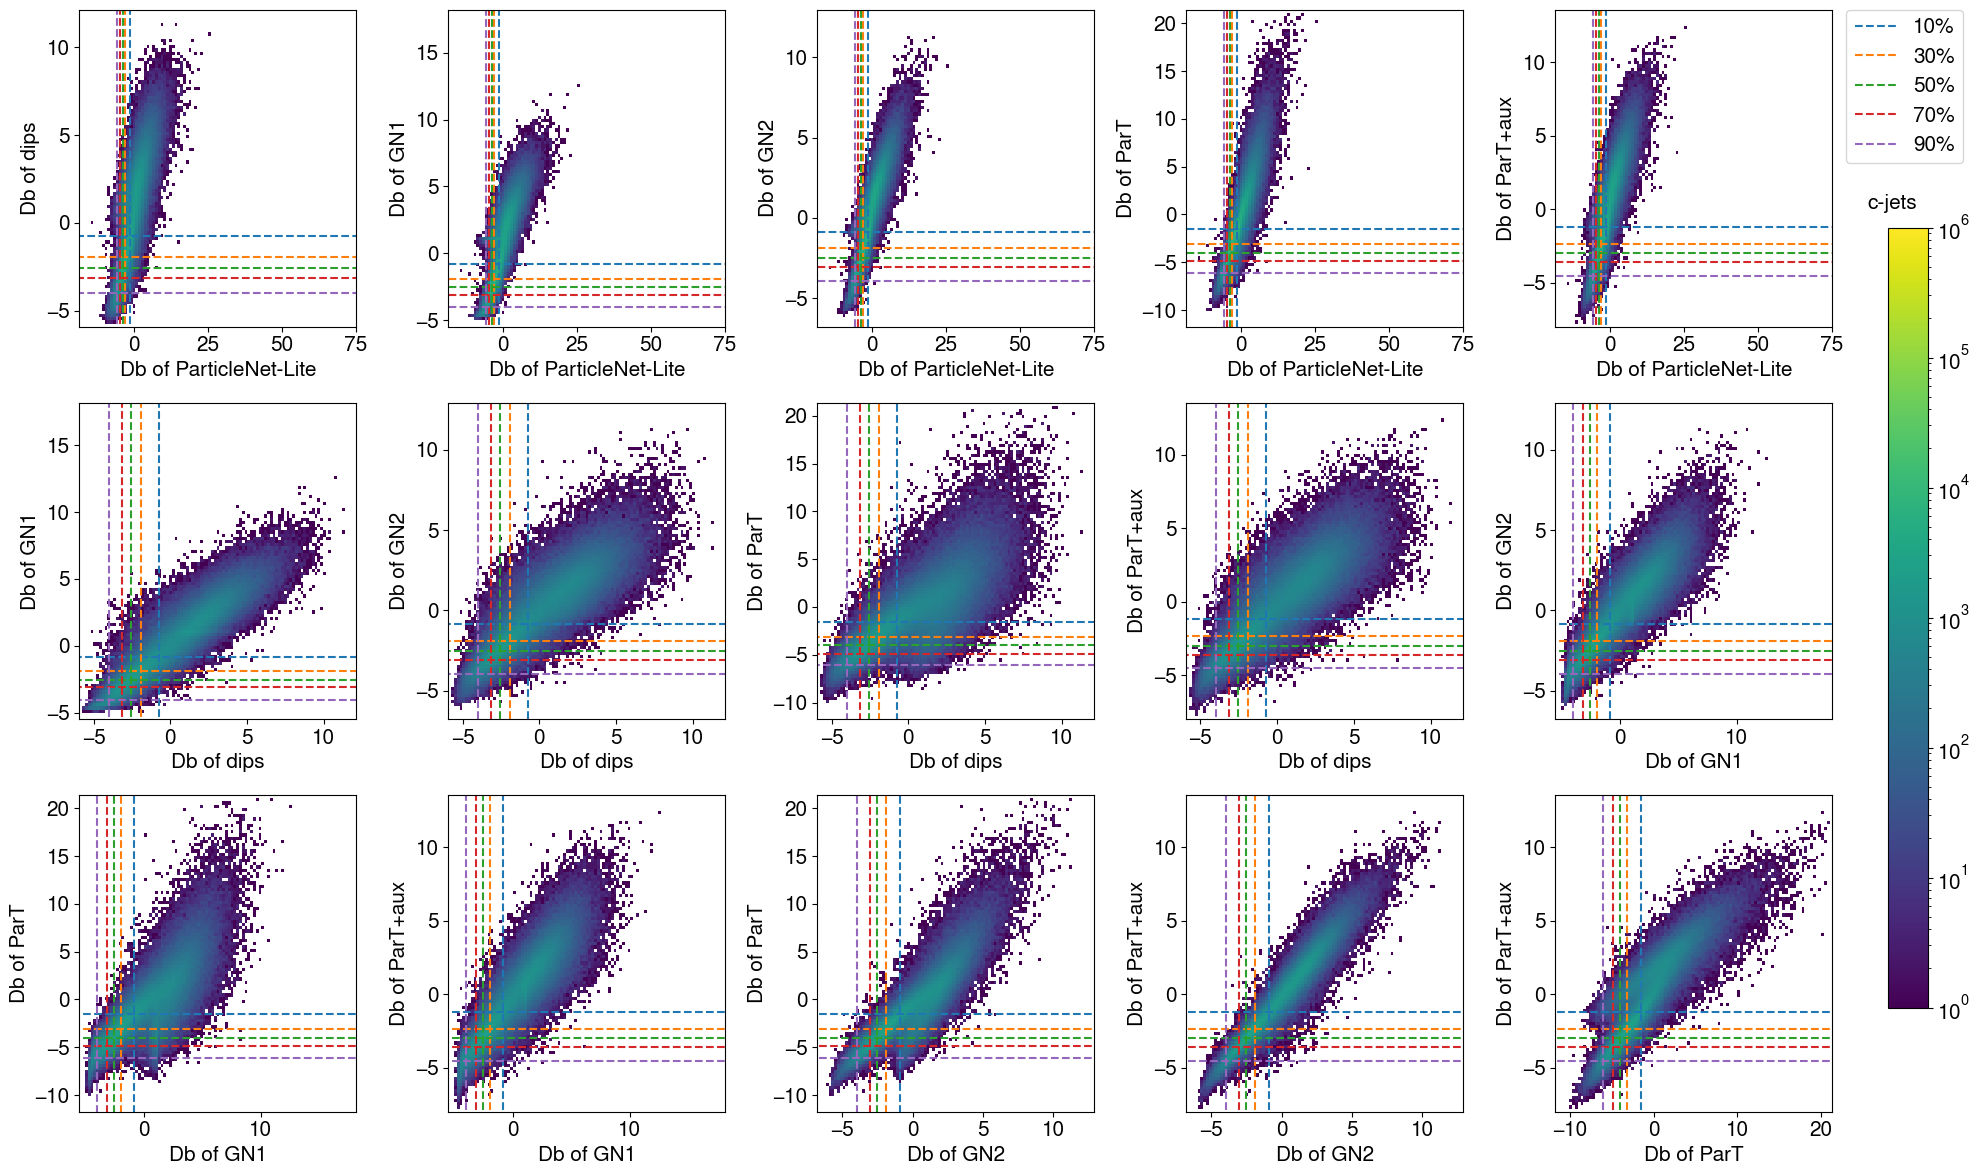

In [32]:
from itertools import combinations
import matplotlib

plt.rcParams['font.size'] = 15

def scaler(Db,ths=None):
    _min, _max = np.min(Db), np.max(Db)
    Db_normed = (Db - _min) / (_max - _min)
    if ths is None:
        return Db_normed
    else:
        ths_normed = (ths - _min) / (_max - _min)
        return Db_normed, ths_normed

ths_lines = [10, 30, 50, 70, 90]
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1e6)

for k, (model1, model2) in enumerate(combinations(comparator_plotter_ttbar.model_names, 2)):
    ax = axes[k//5, k%5]
    th_1 = [dict_Db_ths[model1][i] for i in ths_lines]
    th_2 = [dict_Db_ths[model2][i] for i in ths_lines]
    Db_model1, Db_model2 = df_concat[f"Db_{model1}"].values, df_concat[f"Db_{model2}"].values
    is_b = df_concat["HadronConeExclTruthLabelID"] == 5
    is_c = df_concat["HadronConeExclTruthLabelID"] == 4
    is_l = df_concat["HadronConeExclTruthLabelID"] == 0
    # Db_model1, th_1 = scaler(Db_model1, th_1)
    # Db_model2, th_2 = scaler(Db_model2, th_2)
    # if model1 == "ParticleNet-Lite":
    #     bins = (np.linspace(-20, 60, 100), 100)
    # else:
    #     bins = 100
    
    # 上下X個を除いてヒストグラムを描画
    n_cut = 10
    Db_model1_sorted, Db_model2_sorted = np.sort(Db_model1), np.sort(Db_model2)
    m1_10th_min, m1_10th_max = Db_model1_sorted[n_cut], Db_model1_sorted[-n_cut]
    m2_10th_min, m2_10th_max = Db_model2_sorted[n_cut], Db_model2_sorted[-n_cut]
    bins = (np.linspace(m1_10th_min, m1_10th_max, 100), np.linspace(m2_10th_min, m2_10th_max, 100))

    H = ax.hist2d(Db_model1[is_c], Db_model2[is_c], bins=bins, norm=norm, cmin=1, cmax=1e6)
    ax.set_xlabel(f"Db of {model1}")
    ax.set_ylabel(f"Db of {model2}")

    for i, (_th_1, _th_2) in enumerate(zip(th_1, th_2)):
        ax.vlines(_th_1, Db_model2.min(), Db_model2.max(), color=f"C{i}", linestyle="dashed", label=f"{ths_lines[i]}%")
        ax.hlines(_th_2, Db_model1.min(), Db_model1.max(), color=f"C{i}", linestyle="dashed")


axes[0, -1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
# 右に大きいcolorbarをつける
fig.subplots_adjust(right=1.05)
fig.text(0.94, 0.82, 'c-jets', va='center')
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.65])
fig.colorbar(H[3], cax=cbar_ax, norm=norm)
plt.tight_layout()
plt.show()

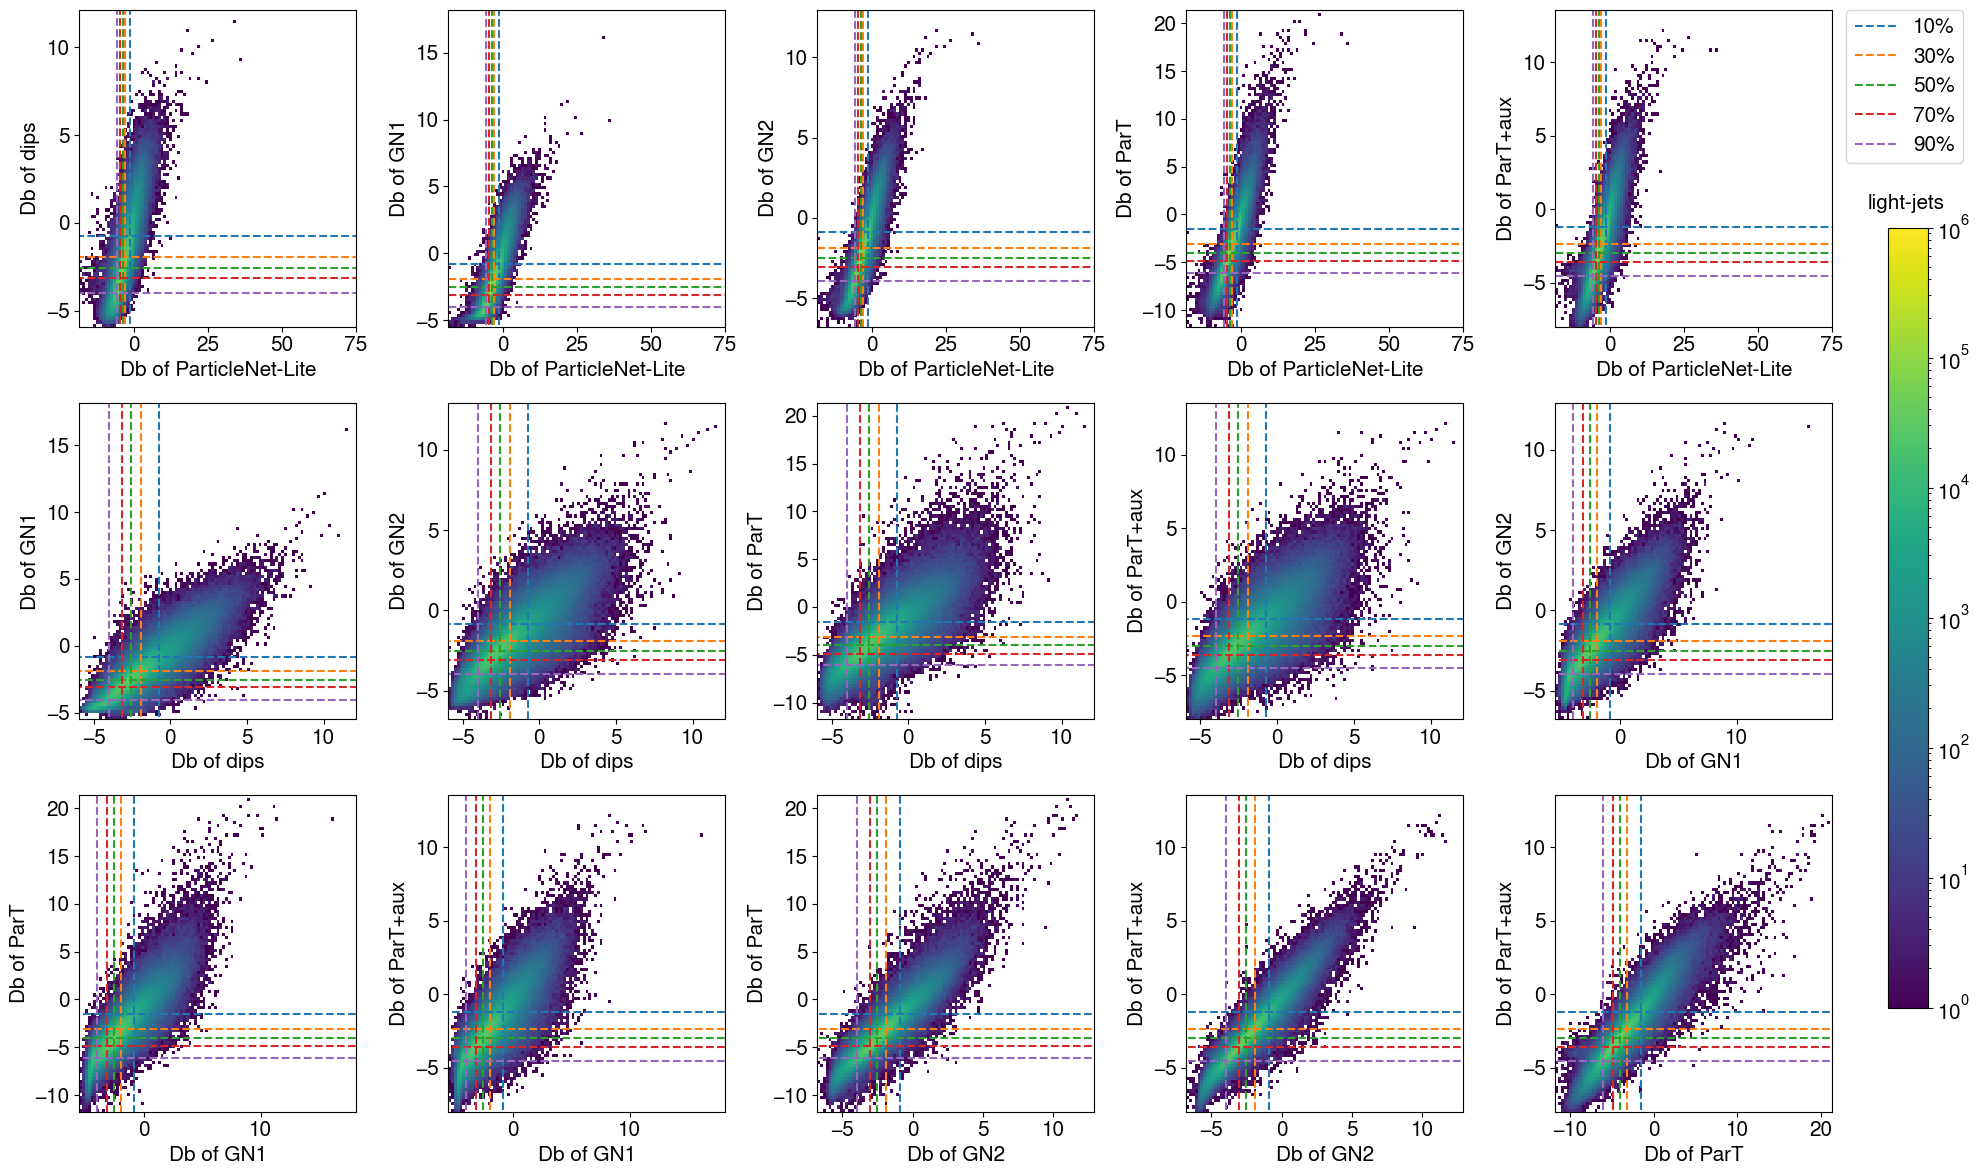

In [30]:
from itertools import combinations
import matplotlib

plt.rcParams['font.size'] = 15

def scaler(Db,ths=None):
    _min, _max = np.min(Db), np.max(Db)
    Db_normed = (Db - _min) / (_max - _min)
    if ths is None:
        return Db_normed
    else:
        ths_normed = (ths - _min) / (_max - _min)
        return Db_normed, ths_normed

ths_lines = [10, 30, 50, 70, 90]
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
norm = matplotlib.colors.LogNorm(vmin=1, vmax=1e6)

for k, (model1, model2) in enumerate(combinations(comparator_plotter_ttbar.model_names, 2)):
    ax = axes[k//5, k%5]
    th_1 = [dict_Db_ths[model1][i] for i in ths_lines]
    th_2 = [dict_Db_ths[model2][i] for i in ths_lines]
    Db_model1, Db_model2 = df_concat[f"Db_{model1}"].values, df_concat[f"Db_{model2}"].values
    is_b = df_concat["HadronConeExclTruthLabelID"] == 5
    is_c = df_concat["HadronConeExclTruthLabelID"] == 4
    is_l = df_concat["HadronConeExclTruthLabelID"] == 0
    # Db_model1, th_1 = scaler(Db_model1, th_1)
    # Db_model2, th_2 = scaler(Db_model2, th_2)
    # if model1 == "ParticleNet-Lite":
    #     bins = (np.linspace(-20, 60, 100), 100)
    # else:
    #     bins = 100
    
    # 上下X個を除いてヒストグラムを描画
    n_cut = 10
    Db_model1_sorted, Db_model2_sorted = np.sort(Db_model1), np.sort(Db_model2)
    m1_10th_min, m1_10th_max = Db_model1_sorted[n_cut], Db_model1_sorted[-n_cut]
    m2_10th_min, m2_10th_max = Db_model2_sorted[n_cut], Db_model2_sorted[-n_cut]
    bins = (np.linspace(m1_10th_min, m1_10th_max, 100), np.linspace(m2_10th_min, m2_10th_max, 100))

    H = ax.hist2d(Db_model1[is_l], Db_model2[is_l], bins=bins, norm=norm, cmin=1, cmax=1e6)
    ax.set_xlabel(f"Db of {model1}")
    ax.set_ylabel(f"Db of {model2}")

    for i, (_th_1, _th_2) in enumerate(zip(th_1, th_2)):
        ax.vlines(_th_1, Db_model2.min(), Db_model2.max(), color=f"C{i}", linestyle="dashed", label=f"{ths_lines[i]}%")
        ax.hlines(_th_2, Db_model1.min(), Db_model1.max(), color=f"C{i}", linestyle="dashed")


axes[0, -1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=15)
# 右に大きいcolorbarをつける
fig.subplots_adjust(right=1.05)
fig.text(0.94, 0.82, 'light-jets', va='center')
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.65])
fig.colorbar(H[3], cax=cbar_ax, norm=norm)
plt.tight_layout()
plt.show()

In [5]:
btag_plot_roc_ttbar = comparator_plotter_ttbar.plot_btag_rejection_comparison(lim_eff=(0.6, 1.0))
ctag_plot_roc_ttbar = comparator_plotter_ttbar.plot_ctag_rejection_comparison(lim_eff=(0.2, 1.0))

Saved ./comparisons/part-aux-all/ttbar/comparisons/btag_rejection_comparison.pdf
Saved ./comparisons/part-aux-all/ttbar/comparisons/ctag_rejection_comparison.pdf


In [11]:
model_names = [model["name"] for model in config["models"]]
btag_roc_values_ttbar = RocAnalyzer(model_names, btag_plot_roc_ttbar).get_rejection_vlues_at_wp(wp=0.7)
ctag_roc_values_ttbar = RocAnalyzer(model_names, ctag_plot_roc_ttbar).get_rejection_vlues_at_wp(wp=0.3)

In [12]:
if not os.path.exists(os.path.join(base_dir, "rejection_values.yaml")):
    with open(os.path.join(base_dir, "rejection_values.yaml"), "w") as f:
        yaml.dump({"ttbar": {"btag": btag_roc_values_ttbar, "ctag": ctag_roc_values_ttbar}}, f)
else:
    with open(os.path.join(base_dir, "rejection_values.yaml"), "r") as f:
        rejection_values = yaml.load(f, Loader=yaml.SafeLoader)
    rejection_values["ttbar"]["btag"].update(btag_roc_values_ttbar)
    rejection_values["ttbar"]["ctag"].update(ctag_roc_values_ttbar)

    with open(os.path.join(base_dir, "rejection_values.yaml"), "w") as f:
        yaml.dump(rejection_values, f)

In [5]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 3500),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [6]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 150),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [7]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 600),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [8]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 50),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [9]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 6000),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [10]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 100),
    working_point=0.7,
    logy=False,
)

In [11]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 1000),
    working_point=0.3,
    logy=False,
)

In [12]:
comparator_plotter_ttbar.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 80),
    working_point=0.3,
    logy=False,
)

In [13]:
comparator_plotter_ttbar.plot_btag_iso_efficiency(
    fc_values=np.linspace(0., 1.0, 101),
    fc_target_value=0.018, wp=0.7, use_log=True,
    # xlim=(1e-2, 1e0),
    ylim=(1e-4, 2e-2),
)

fc_target_value 0.018
selected index 2
selected fc value 0.02


In [14]:
comparator_plotter_ttbar.plot_ctag_iso_efficiency(
    fb_values=np.linspace(0., 1.0, 101),
    fb_target_value=0.20, wp=0.3, use_log=True,
    # xlim=(1e-2, 1e0), ylim=(1e-4, 1e-2),
)

fb_target_value 0.2
selected index 1
selected fb value 0.2


## $Z'$サンプル

In [13]:
comparator_zprime = Comparator(config, sample="zprime")
comparator_plotter_zprime = ComparatorPlotter(comparator_zprime, save_dir=os.path.join(base_dir, "zprime", "comparisons"))

meta model:	ParticleNet-Lite
ref. model:	dips
Before cut nan:  4016172
After cut nan:  3997931
No cut by condition
Before cut nan:  4016172
After cut nan:  3997931
No cut by condition


In [38]:
df_concat = comparator_plotter_zprime.df_concat
df_concat = df_concat[~df_concat.isin([np.inf, -np.inf, np.nan]).any(1)]

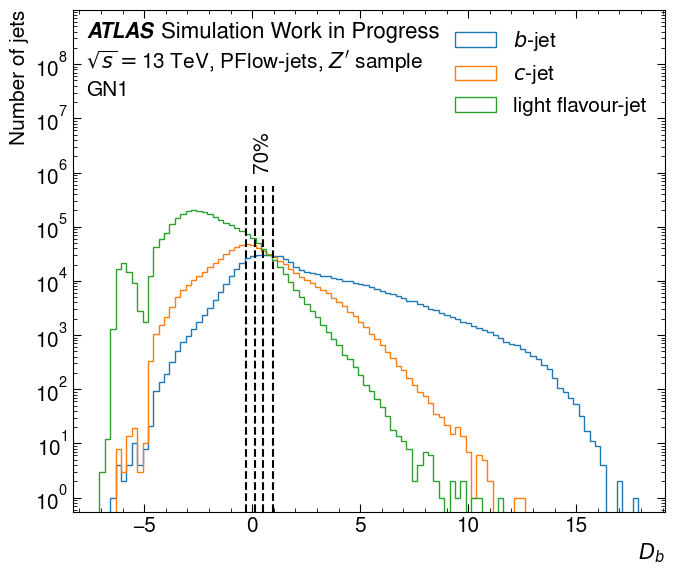

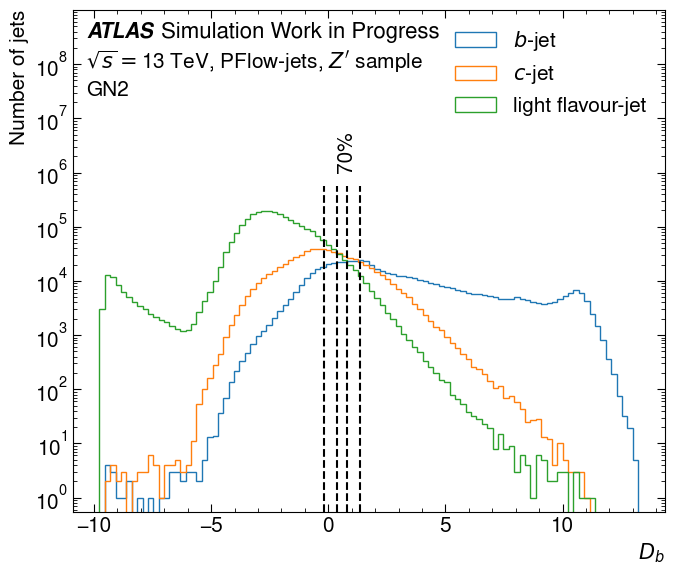

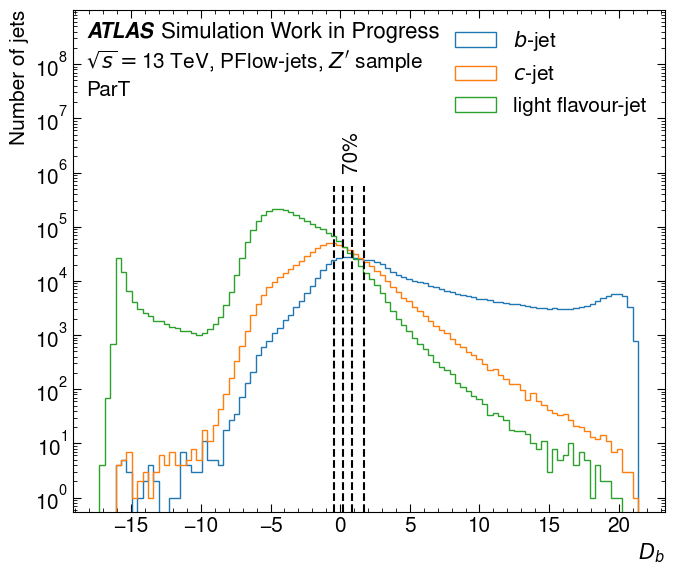

In [44]:
%matplotlib inline
plt.rcParams["font.size"] = 15
for model_name in comparator_ttbar.model_names:
    fig, ax = plt.subplots(figsize=(7, 6))
    Db_min, Db_max = np.min(df_concat[f"Db_{model_name}"]), np.max(df_concat[f"Db_{model_name}"])
    if model_name == "ParticleNet-Lite":
        Db_max = 60
    ax.hist(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], bins=100, range=(Db_min, Db_max), histtype="step", label="$b$-jet")
    ax.hist(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], bins=100, range=(Db_min, Db_max), histtype="step", label="$c$-jet")
    ax.hist(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 0], bins=100, range=(Db_min, Db_max), histtype="step", label="light flavour-jet")
    for wp in [0.60, 0.70, 0.77, 0.85]:
        ax.axvline(get_btag_wp(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], wp=wp), color="black", linestyle="--", ymax=0.65)
        if wp != 0.70:
            continue
        ax.text(get_btag_wp(df_concat[f"Db_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], wp=wp), 1e6, f"{wp*100:.0f}%", ha="center", va="bottom", rotation=90)
    ax.set_yscale("log")
    ax.set_xlabel(f"$D_{{b}}$", loc="right")
    ax.set_ylabel("Number of jets", loc="top")
    ax.set_ylim(0, 1e7)
    ax.legend(loc="upper right")

    atlasify.atlasify(
        axes=ax,
        atlas="Simulation Work in Progress",
        subtext="$\sqrt{s}=$13 TeV, PFlow-jets, $Z'$ sample"+f"\n{model_name}",
        font_size=15,
        sub_font_size=15,
        subtext_distance=0.15,
        enlarge=100,
    )
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, "zprime", f"Db_{model_name}.pdf"), bbox_inches="tight")
    plt.show()

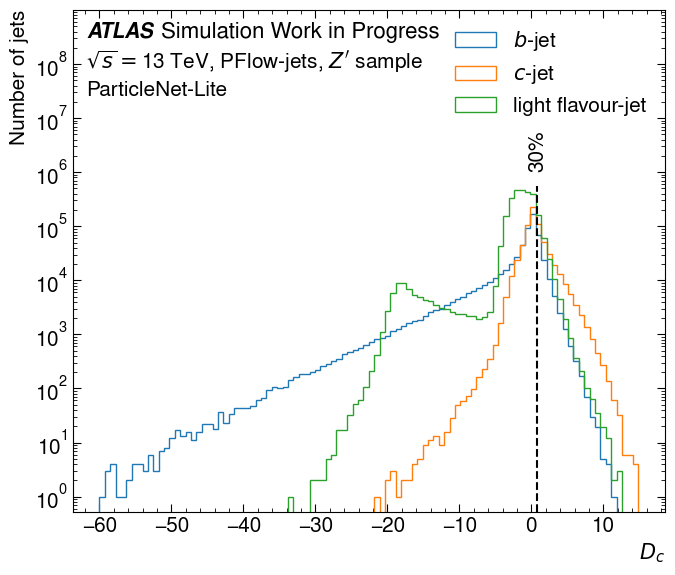

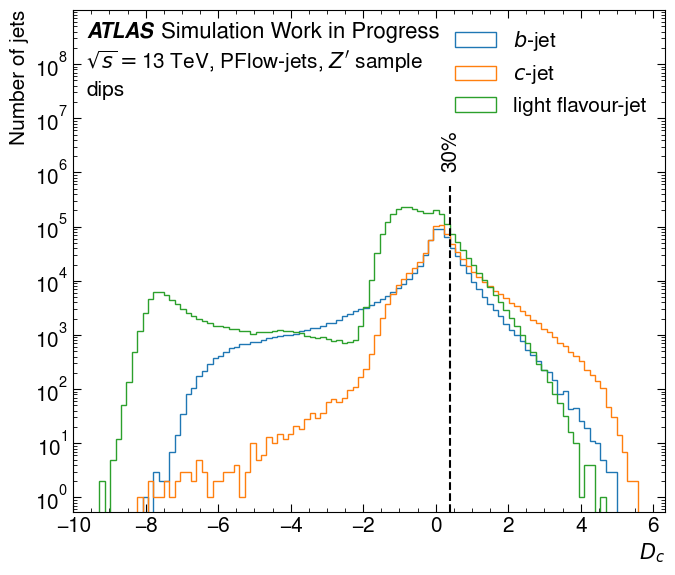

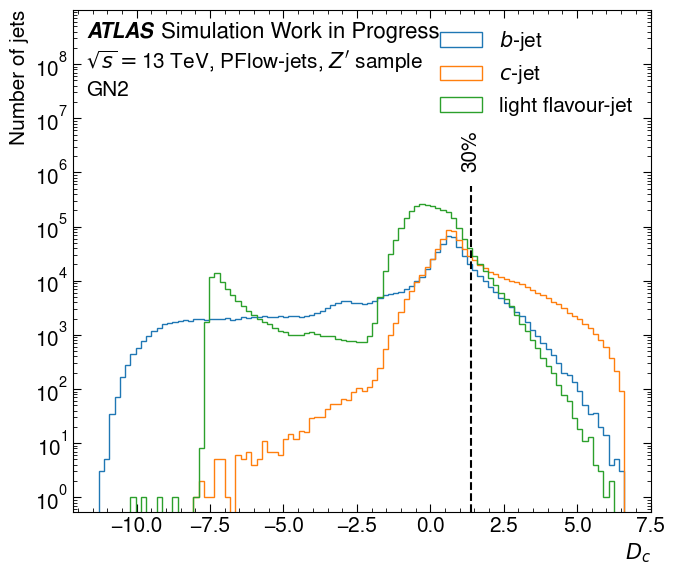

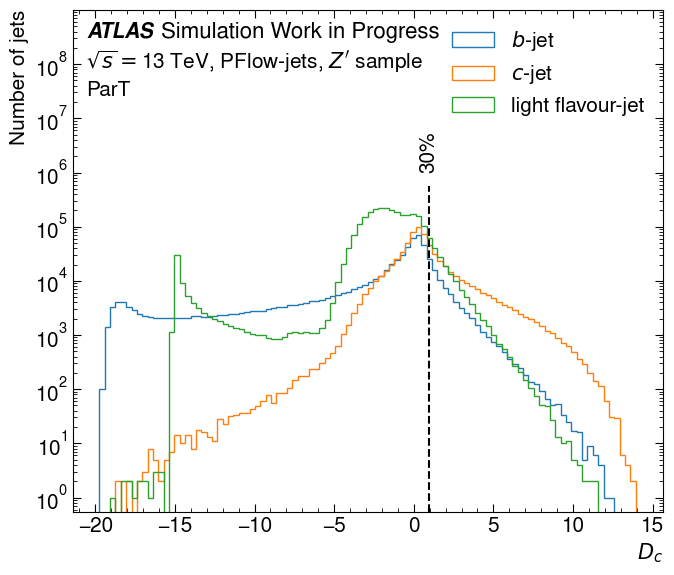

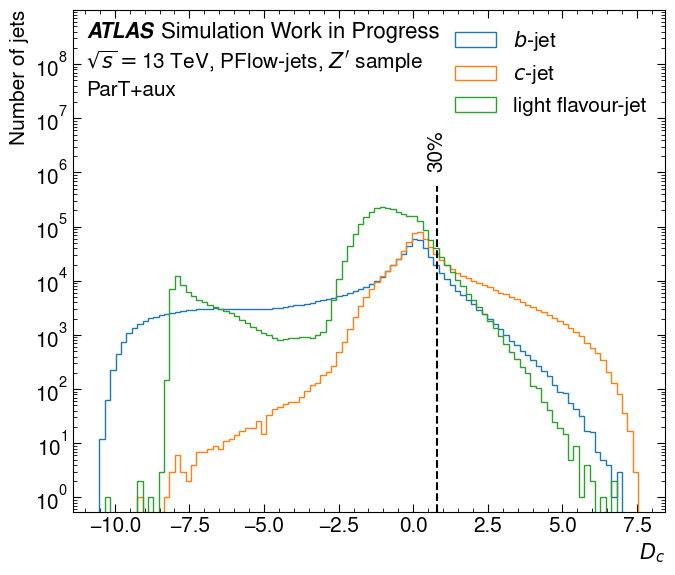

In [41]:
%matplotlib inline
plt.rcParams["font.size"] = 15
for model_name in comparator_ttbar.model_names:
    fig, ax = plt.subplots(figsize=(7, 6))
    Db_min, Db_max = np.min(df_concat[f"Dc_{model_name}"]), np.max(df_concat[f"Dc_{model_name}"])
    if model_name == "ParticleNet-Lite":
        Db_min = -60
    ax.hist(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 5], bins=100, range=(Db_min, Db_max), histtype="step", label="$b$-jet")
    ax.hist(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], bins=100, range=(Db_min, Db_max), histtype="step", label="$c$-jet")
    ax.hist(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 0], bins=100, range=(Db_min, Db_max), histtype="step", label="light flavour-jet")
    for wp in [0.3]:
        ax.axvline(get_btag_wp(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], wp=wp), color="black", linestyle="--", ymax=0.65)
        ax.text(get_btag_wp(df_concat[f"Dc_{model_name}"][df_concat["HadronConeExclTruthLabelID"] == 4], wp=wp), 1e6, f"{wp*100:.0f}%", ha="center", va="bottom", rotation=90)
    ax.set_yscale("log")
    ax.set_xlabel(f"$D_{{c}}$", loc="right")
    ax.set_ylabel("Number of jets", loc="top")
    ax.set_ylim(0, 1e7)
    ax.legend(loc="upper right")

    atlasify.atlasify(
        axes=ax,
        atlas="Simulation Work in Progress",
        subtext="$\sqrt{s}=$13 TeV, PFlow-jets, $Z'$ sample"+f"\n{model_name}",
        font_size=15,
        sub_font_size=15,
        subtext_distance=0.15,
        enlarge=100,
    )
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir, "zprime", f"Dc_{model_name}.pdf"), bbox_inches="tight")
    plt.show()

In [14]:
btag_roc_values_zprime = comparator_plotter_zprime.plot_btag_rejection_comparison(lim_eff=(0.6, 1.0))
ctag_roc_values_zprime = comparator_plotter_zprime.plot_ctag_rejection_comparison(lim_eff=(0.2, 1.0))

Saved ./comparisons/part-aux-all/zprime/comparisons/btag_rejection_comparison.pdf
Saved ./comparisons/part-aux-all/zprime/comparisons/ctag_rejection_comparison.pdf


In [15]:
model_names = [model["name"] for model in config["models"]]
btag_roc_values_zprime = RocAnalyzer(model_names, btag_roc_values_zprime).get_rejection_vlues_at_wp(wp=0.7)
ctag_roc_values_zprime = RocAnalyzer(model_names, ctag_roc_values_zprime).get_rejection_vlues_at_wp(wp=0.3)

In [17]:
if not os.path.exists(os.path.join(base_dir, "rejection_values.yaml")):
    with open(os.path.join(base_dir, "rejection_values.yaml"), "w") as f:
        yaml.dump({"zprime": {"btag": btag_roc_values_zprime, "ctag": ctag_roc_values_zprime}}, f)
else:
    with open(os.path.join(base_dir, "rejection_values.yaml"), "r") as f:
        rejection_values = yaml.load(f, Loader=yaml.SafeLoader)
    if "zprime" not in rejection_values:
        rejection_values["zprime"] = {"btag":{}, "ctag":{}}

    rejection_values["zprime"]["btag"].update(btag_roc_values_zprime)
    rejection_values["zprime"]["ctag"].update(ctag_roc_values_zprime)

    with open(os.path.join(base_dir, "rejection_values.yaml"), "w") as f:
        yaml.dump(rejection_values, f)

In [17]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 150),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [18]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 10),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.7,
    logy=False,
)

In [19]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 50),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [20]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="pt",
    bins=[20, 30, 40, 60, 85, 110, 140, 175, 250, 350, 450, 550, 650],
    ylim=(0, 15),
    x_label=r"$p_{T}$ [GeV]",
    working_point=0.3,
    logy=False,
)

In [21]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 120),
    working_point=0.7,
    logy=False,
)

In [22]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="b",
    background_flavor="c",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 10),
    working_point=0.7,
    logy=False,
)

In [23]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="l",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 60),
    working_point=0.3,
    logy=False,
)

In [24]:
comparator_plotter_zprime.var_vs_plot(
    signal_flavor="c",
    background_flavor="b",
    var="absEta",
    bins=np.linspace(0, 2.5, 10),
    ylim=(0, 20),
    working_point=0.3,
    logy=False,
)

In [25]:
comparator_plotter_zprime.plot_btag_iso_efficiency(
    fc_values=np.linspace(0., 1.0, 101),
    fc_target_value=0.018, wp=0.7, use_log=True,
    xlim = (1e-1, 1e-0),
    # ylim=(0.025, 0.10),
)

fc_target_value 0.018
selected index 2
selected fc value 0.02


In [26]:
comparator_plotter_zprime.plot_ctag_iso_efficiency(
    fb_values=np.linspace(0., 1.0, 101),
    fb_target_value=0.20, wp=0.3,
    use_log=True,
    # xlim = (0.19, 0.45),
    # ylim=(0.025, 0.10),
)

fb_target_value 0.2
selected index 4
selected fb value 0.2


## $\epsilon_b=70\%$, $\epsilon_c = 30\%$の時のrejectionの比較

In [1]:
import os

import yaml
import numpy as np
import matplotlib.pyplot as plt
import atlasify
from modules.compare import Comparator, ComparatorPlotter, RocAnalyzer

base_dir = "./comparisons/part-aux-all/"
plt.rcParams["font.size"] = 15
%matplotlib inline

2023-12-29 13:44:12.685095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
with open(os.path.join(base_dir, "rejection_values.yaml"), "r") as f:
    rejection_values = yaml.load(f, Loader=yaml.SafeLoader)

In [39]:
from typing import List, Dict, Tuple, Literal, Optional, Union
def plot_eff_bars(rejection_values, sample:Literal["ttbar", "sample"], tag:Literal["btag", "ctag"], model_names:List[str], save_path:Optional[str]=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax2 = ax.twinx()

    if sample == "ttbar":
        sample_name = "$t\\bar{t}$"
    elif sample == "zprime":
        sample_name = "$Z'$"
    
    if tag == "btag":
        eff = "$\epsilon_{b}=70\%$"
        rej_1 = "Light-jets"
        rej_2 = "c-jets"
        rej_1_name = "Light-jet rejection"
        rej_2_name = "c-jet rejection"
    elif tag == "ctag":
        eff = "$\epsilon_{c}=30\%$"
        rej_1 = "Light-jets"
        rej_2 = "b-jets"
        rej_1_name = "Light-jet rejection"
        rej_2_name = "b-jet rejection"

    x_values = range(len(model_names))
    reference_rej_1 = rejection_values[sample][tag]["dips"][rej_1][0]
    reference_rej_2 = rejection_values[sample][tag]["dips"][rej_2][0]

    for x, model_name in zip(x_values, model_names):
        rejection = rejection_values[sample][tag][model_name]
        rej_1_height = rejection[rej_1][0]
        rej_2_height = rejection[rej_2][0]
        ax.bar(model_name, rejection[rej_1][0], yerr=rejection[rej_1][1], color="C0", align="edge", width=-0.4)
        ax2.bar(model_name, rejection[rej_2][0], yerr=rejection[rej_2][1], color="C1", align="edge", width=0.4)
        ax.text(x-0.2, rej_1_height + (rej_1_height * 0.05), f"x{rej_1_height/reference_rej_1:.1f}", ha="center", va="bottom", color="C0", fontsize=13)
        ax2.text(x+0.2, rej_2_height + (rej_2_height * 0.05), f"x{rej_2_height/reference_rej_2:.1f}", ha="center", va="bottom", color="C1", fontsize=13)
    
    # y軸のラベルを設定
    ax.set_ylabel(rej_1_name, loc="top", color="C0")
    ax2.set_ylabel(rej_2_name, loc="top", color="C1")

    atlasify.atlasify(
        axes=ax,
        atlas="Simulation Work in Progress",
        subtext="$\sqrt{s}=$13 TeV, PFlow-jets, "+sample_name+" sample\n "+eff,
        font_size=15,
        sub_font_size=15,
        subtext_distance=0.15,
        enlarge=1.0,
    )

    ax.set_ylim(0, ax.get_ylim()[1]*1.3)
    ax2.set_ylim(0, ax2.get_ylim()[1]*1.3)

    # xticksのfontsizeを12に設定
    ax.tick_params(axis='x', labelsize=12)

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, bbox_inches="tight")
    plt.show()

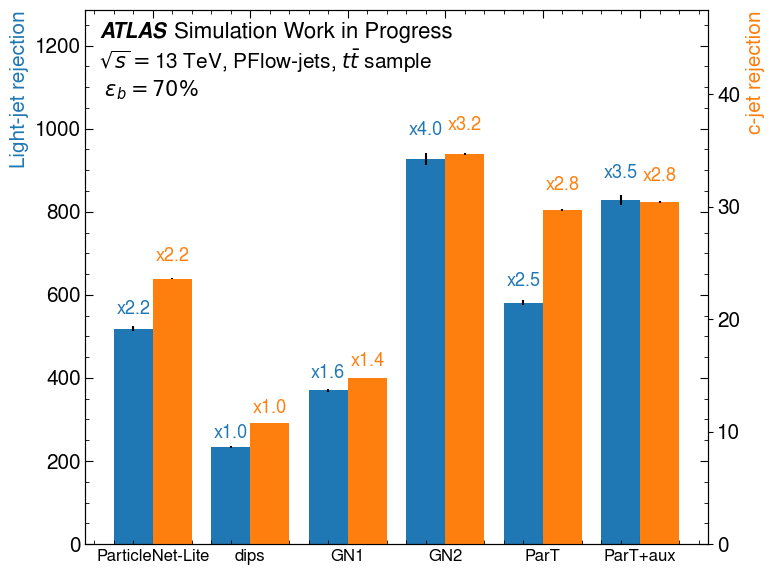

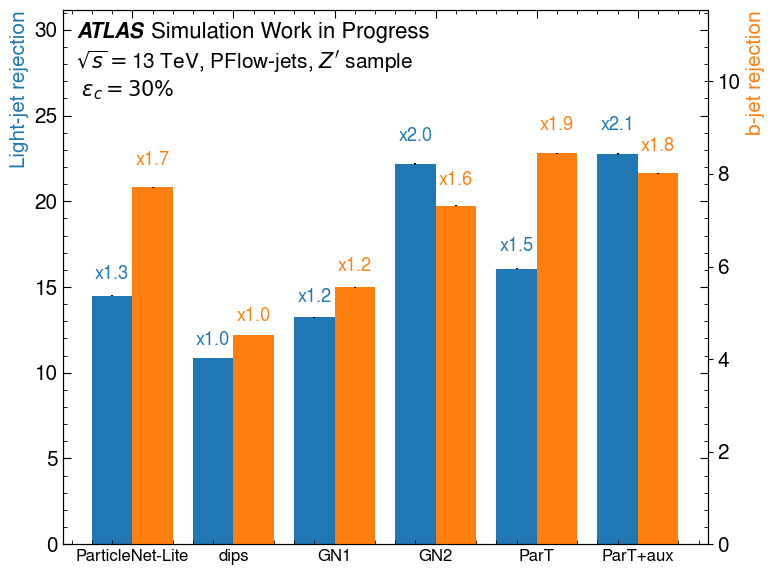

In [40]:
model_names = ["ParticleNet-Lite", "dips", "GN1", "GN2", "ParT", "ParT+aux"]
plot_eff_bars(rejection_values, sample="ttbar", tag="btag", model_names=model_names, save_path=os.path.join(base_dir, "ttbar", "comparisons", "btag_rejection_values.pdf"))
plot_eff_bars(rejection_values, sample="ttbar", tag="ctag", model_names=model_names, save_path=os.path.join(base_dir, "ttbar", "comparisons", "ctag_rejection_values.pdf"))
plot_eff_bars(rejection_values, sample="zprime", tag="btag", model_names=model_names, save_path=os.path.join(base_dir, "zprime", "comparisons", "btag_rejection_values.pdf"))
plot_eff_bars(rejection_values, sample="zprime", tag="ctag", model_names=model_names, save_path=os.path.join(base_dir, "zprime", "comparisons", "ctag_rejection_values.pdf"))

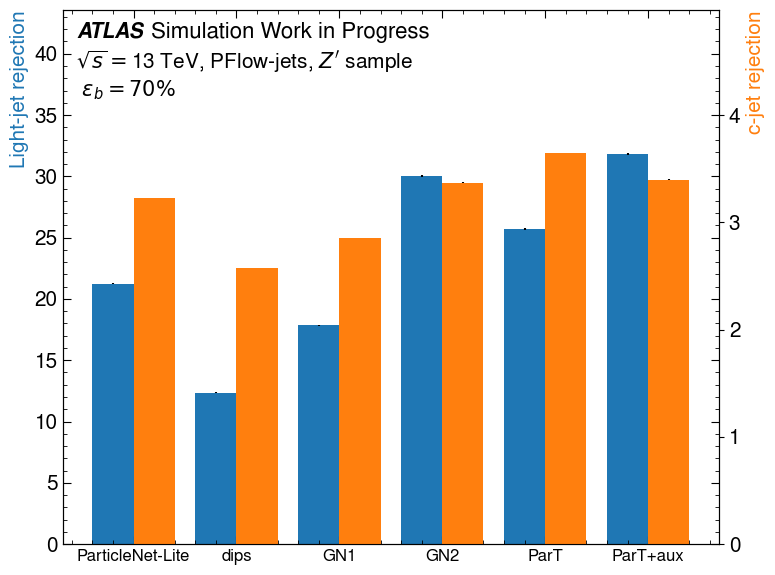

In [81]:
# btag, zprime
fig, ax = plt.subplots(figsize=(8, 6))
ax2 = ax.twinx()

model_names = ["ParticleNet-Lite", "dips", "GN1", "GN2", "ParT", "ParT+aux"]

for model_name in model_names:
    rejection = rejection_values["zprime"]["btag"][model_name]
    ax.bar(model_name, rejection["Light-jets"][0], yerr=rejection["Light-jets"][1], color="C0", align="edge", width=-0.4)
    ax2.bar(model_name, rejection["c-jets"][0], yerr=rejection["c-jets"][1], color="C1", align="edge", width=0.4)

# y軸のラベルを設定
ax.set_ylabel('Light-jet rejection', loc="top", color="C0")
ax2.set_ylabel('c-jet rejection', loc="top", color="C1")

atlasify.atlasify(
    axes=ax,
    atlas="Simulation Work in Progress",
    subtext="$\sqrt{s}=$13 TeV, PFlow-jets, $Z'$ sample\n $\epsilon_{b}=70\%$",
    font_size=15,
    sub_font_size=15,
    subtext_distance=0.15,
    enlarge=1.0,
)

ax.set_ylim(0, ax.get_ylim()[1]*1.3)
ax2.set_ylim(0, ax2.get_ylim()[1]*1.3)

# xticksのfontsizeを12に設定
ax.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# ctag, ttbar
fig, ax = plt.subplots(figsize=(8, 6))
ax2 = ax.twinx()
